* Prepare rules for the all the data sets 
* 1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
* 2) Change the minimum length in apriori algorithm
* 3) Visualize the obtained rules using different plots 

* Loaded the movies dataset
* There are 10 observations and 15 features
* Deleted columns V1 to V5 as there are movies columns in the dataset
* Calculated the best frequent items & association rules for movie dataset

    Support = 0.5, Confidence = 0.7 -- 4 sets of movies which were bought/watched together
    Support = 0.2, Confidence = 0.5 -- 15 sets of movies which were bought/watched together 


* Inferences

* As support(min_support) decreases -- no. of frequent item sets increases
* As confidenc(min_threshold) decreases -- no. of associations increases

## Import Libraries

In [23]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from mlxtend.frequent_patterns import apriori, association_rules

In [12]:
movie_data = pd.read_csv('my_movies.csv')
movie_data

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


## Initial Analysis

In [16]:
movie_data['V1'].value_counts()

Gladiator        6
Sixth Sense      2
Harry Potter1    1
LOTR1            1
Name: V1, dtype: int64

In [17]:
movie_data['V2'].value_counts()

Patriot          6
LOTR             1
Harry Potter2    1
LOTR1            1
LOTR2            1
Name: V2, dtype: int64

In [18]:
movie_data['V3'].value_counts()

Sixth Sense      4
Harry Potter1    1
Braveheart       1
Gladiator        1
Name: V3, dtype: int64

In [19]:
movie_data['V4'].value_counts()

Green Mile    2
Name: V4, dtype: int64

In [20]:
movie_data['V5'].value_counts()

LOTR2    1
Name: V5, dtype: int64

In [4]:
print(movie_data.shape)
print(movie_data.isnull().sum())
print(movie_data.dtypes)

(10, 15)
V1               0
V2               0
V3               3
V4               8
V5               9
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64
V1               object
V2               object
V3               object
V4               object
V5               object
Sixth Sense       int64
Gladiator         int64
LOTR1             int64
Harry Potter1     int64
Patriot           int64
LOTR2             int64
Harry Potter2     int64
LOTR              int64
Braveheart        int64
Green Mile        int64
dtype: object


In [33]:
movies_ds = movie_data.iloc[:,5:]
movies_ds

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0
5,1,1,0,0,1,0,0,0,0,0
6,0,0,0,1,0,0,1,0,0,0
7,0,1,0,0,1,0,0,0,0,0
8,1,1,0,0,1,0,0,0,0,0
9,1,1,0,0,0,0,0,1,0,1


In [37]:
print(movies_ds.shape)
print(movies_ds.isna().sum())
print(movies_ds.dtypes)

(10, 10)
Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64
Sixth Sense      int64
Gladiator        int64
LOTR1            int64
Harry Potter1    int64
Patriot          int64
LOTR2            int64
Harry Potter2    int64
LOTR             int64
Braveheart       int64
Green Mile       int64
dtype: object


## Building Association Rules

### Support = 0.5 & Confidence =0.7

In [49]:
# Frequent item sets
frequent_items = apriori(df = movies_ds, min_support=0.5, use_colnames=True)
print(frequent_items.shape)
frequent_items

(5, 2)


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.6,(Patriot)
3,0.5,"(Sixth Sense, Gladiator)"
4,0.6,"(Gladiator, Patriot)"


In [50]:
rules = association_rules(df= frequent_items, metric='confidence', min_threshold=0.7)
print(rules.shape)
rules

(4, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
3,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf


* People who watched Sixth Sense also watched Gladiator
* People who watched Gladiator also watched Sixth Sense

Text(0.5, 0, 'Confidence')

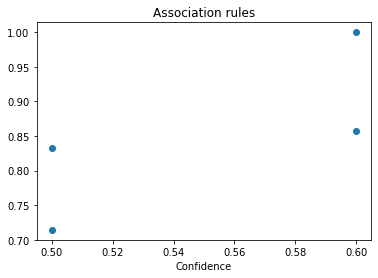

In [32]:
plt.figure(figsize = (6,4))
plt.title('Association rules')
plt.scatter(rules['support'],rules['confidence'])
plt.xlabel("Support")
plt.xlabel("Confidence")

### Support = 0.2 & Confidence = 0.5

In [53]:
# Frequent item sets
frequent_items_1 = apriori(df = movies_ds, min_support=0.2, use_colnames=True)
print(frequent_items_1.shape)
frequent_items_1

(13, 2)


,support,itemsets
0,0.6,(Sixth Sense)
1,0.7,(Gladiator)
2,0.2,(LOTR1)
3,0.2,(Harry Potter1)
4,0.6,(Patriot)
5,0.2,(LOTR2)
6,0.2,(Green Mile)
7,0.5,"(Sixth Sense, Gladiator)"
8,0.4,"(Sixth Sense, Patriot)"
9,0.2,"(Sixth Sense, Green Mile)"


In [54]:
rules_1 = association_rules(df= frequent_items_1, metric='confidence', min_threshold=0.5)
print(rules_1.shape)
rules_1

(15, 9)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Sixth Sense),(Gladiator),0.6,0.7,0.5,0.833333,1.190476,0.08,1.8
1,(Gladiator),(Sixth Sense),0.7,0.6,0.5,0.714286,1.190476,0.08,1.4
2,(Sixth Sense),(Patriot),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
3,(Patriot),(Sixth Sense),0.6,0.6,0.4,0.666667,1.111111,0.04,1.2
4,(Green Mile),(Sixth Sense),0.2,0.6,0.2,1.000000,1.666667,0.08,inf
5,(Gladiator),(Patriot),0.7,0.6,0.6,0.857143,1.428571,0.18,2.8
6,(Patriot),(Gladiator),0.6,0.7,0.6,1.000000,1.428571,0.18,inf
7,(LOTR1),(LOTR2),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
8,(LOTR2),(LOTR1),0.2,0.2,0.2,1.000000,5.000000,0.16,inf
9,"(Sixth Sense, Patriot)",(Gladiator),0.4,0.7,0.4,1.000000,1.428571,0.12,inf


Text(0.5, 0, 'Confidence')

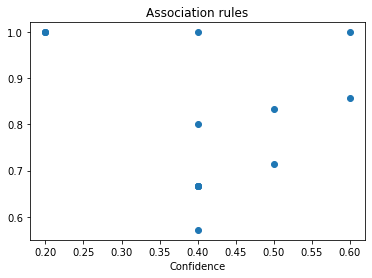

In [55]:
plt.figure(figsize = (6,4))
plt.title('Association rules')
plt.scatter(rules_1['support'],rules_1['confidence'])
plt.xlabel("Support")
plt.xlabel("Confidence")